In [37]:
import numpy as np
import sys
sys.path.append('../../../otf/otf_engine')
import gp, env, struc, kernels, otf
sys.path.append('../../../otf/modules')
import qe_parsers, analyze_gp, parse_output_temp, otf_parser, calculate_rdf, \
    analyze_otf, crystals, activation_parser, analyze_md, otf_parser_v2, analyze_gp_v2
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
import copy

# return to default and make the fontbigger
plt.rcParams.update(plt.rcParamsDefault)
font = {'size'   : 15}
plt.rc('font', **font)

# Quench Figure

In [2]:
file_name = '/Users/jonpvandermause/Research/GP/otf/datasets/Quench_Runs/otf_run.out'
otf_run = otf_parser_v2.OtfAnalysis(file_name)

In [6]:
# record msd and dft calls
end = 150
dft_tot = 30

quench_times = otf_run.times[0 : end]
quench_msds = otf_run.msds[0 : end]

In [32]:
# record uncertainties
mean_stds = []
max_stds = []

for std in otf_run.uncertainty_list:
    mean_stds.append(np.mean(std))
    max_stds.append(np.max(std))
    
mean_stds = np.array(mean_stds)
max_stds = np.array(max_stds)

plot_max_stds = max_stds[0 : end]
plot_mean_stds = mean_stds[0 :end]

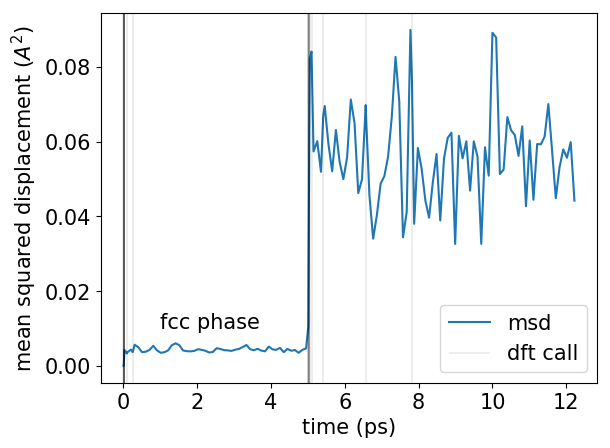

In [77]:
# make figure
f, (ax1) = plt.subplots(1, 1)

# plot vertical line for every dft call
ax1.plot(quench_times, quench_msds, label='msd')

for count, dft_time in enumerate(otf_run.dft_times[0:dft_tot]):
    if count == 0:
        ax1.axvline(dft_time, linestyle='-', color='k', linewidth='0.1', label='dft call')
    else:
        ax1.axvline(dft_time, linestyle='-', color='k', linewidth='0.1')
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('mean squared displacement ($A^2$)')
plt.text(1, 0.01, 'fcc phase', rotation=0.)
ax1.legend()


f.savefig('melt_msd.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [83]:
# calculate rdf
position_list = otf_run.position_list
cell = 8.092 * np.eye(3)
species = ['Al']*32
snaps = np.arange(500, 3600, 1)
cutoff = 8.092
bins = 200

rs, rad_dist, atom_count = calculate_rdf.calculate_rdf(position_list, cell, species, snaps, cutoff, bins)

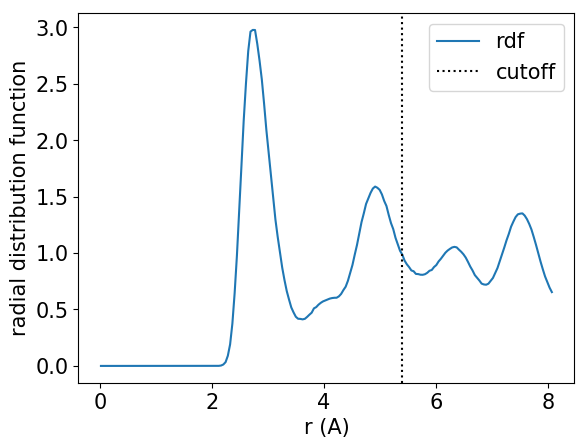

In [84]:
# plot rdf
f, (ax1) = plt.subplots(1, 1)
ax1.plot(rs, rad_dist, label='rdf')
ax1.set_xlabel('r (A)')
ax1.set_ylabel('radial distribution function')
ax1.axvline(5.4, color='k', linestyle=':', label='cutoff')
ax1.legend()

f.savefig('rdf.pdf', format='pdf',bbox_inches='tight')
plt.show()

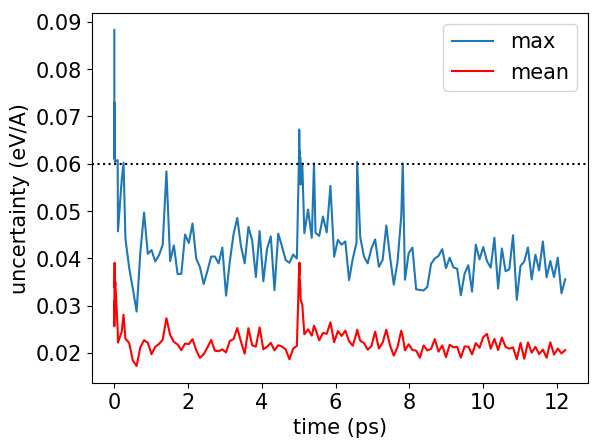

In [51]:
# plot uncertainties
f = plt.figure()
plt.plot(quench_times, plot_max_stds, label='max')
plt.plot(quench_times, plot_mean_stds, color='r', label='mean')
plt.axhline(0.06, color='k', linestyle=':')
plt.xlabel('time (ps)')
plt.ylabel('uncertainty (eV/A)')
plt.legend()

f.savefig('uncertainty.pdf', format='pdf',bbox_inches='tight')
plt.show()